In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [6]:
data = pd.read_csv("behavioural_dataset.csv")
data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


In [7]:
data.shape

(99, 8)

In [16]:
# Converting categorical variables to numerical variable
data['Marrital Status'] = data['Marrital Status'].replace({'Single': 0, 'Married': 1})

data['Personal loan'] = data['Personal loan'].replace({'No': 0, 'Yes': 1})
data['Profession'] = data['Profession'].replace({'Salaried': 0, 'Business': 1})
data['Education'] = data['Education'].replace({'Graduate': 0, 'Post Graduate': 1})


In [17]:
data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,0,0,1,0,1,800000,800000
1,35,0,1,1,2,1,2000000,1000000
2,45,1,1,0,4,1,1800000,1200000
3,41,1,1,1,3,0,2200000,1200000
4,31,0,1,1,2,1,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,1,0,0,0,0,2400000,1600000
95,50,0,1,1,3,0,5100000,1600000
96,51,1,1,0,2,1,2200000,1100000
97,51,0,1,1,2,0,4000000,1500000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               99 non-null     int64
 1   Profession        99 non-null     int64
 2   Marrital Status   99 non-null     int64
 3   Education         99 non-null     int64
 4   No of Dependents  99 non-null     int64
 5   Personal loan     99 non-null     int64
 6   Total Salary      99 non-null     int64
 7   Price             99 non-null     int64
dtypes: int64(8)
memory usage: 6.3 KB


In [19]:
# Checking for missing values
print(data.isnull().sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [20]:
data.head(11)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,0,0,1,0,1,800000,800000
1,35,0,1,1,2,1,2000000,1000000
2,45,1,1,0,4,1,1800000,1200000
3,41,1,1,1,3,0,2200000,1200000
4,31,0,1,1,2,1,2600000,1600000
5,28,0,1,0,3,1,900000,700000
6,31,0,1,0,4,0,1800000,1200000
7,33,1,1,1,4,0,1400000,700000
8,34,1,1,1,4,0,2000000,1100000
9,34,0,1,0,3,1,1900000,800000


In [21]:
data.columns.values.tolist()

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'Total Salary',
 'Price']

In [22]:
# Converting the first few entries into an array
ev_a = data.iloc[:, 0:11]

# Calculating column means and round to 2 decimal places
mean=round(ev_a.mean(),2)

mean

Age                      36.31
Profession                0.35
Marrital Status           0.85
Education                 0.57
No of Dependents          2.18
Personal loan             0.32
Total Salary        2270707.07
Price               1194040.40
dtype: float64

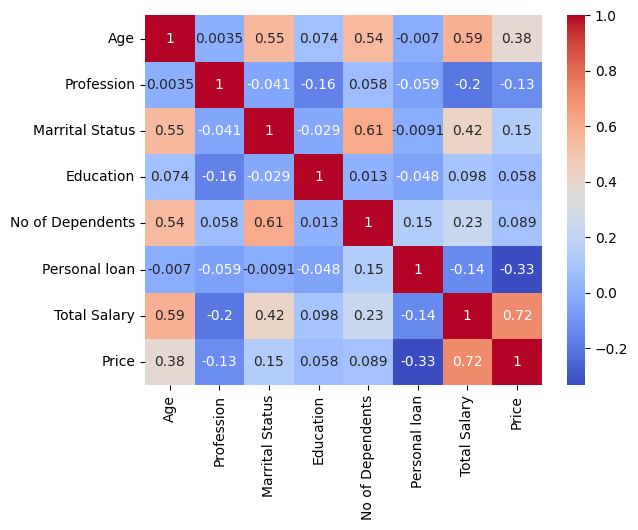

In [23]:
# Visualization for assessing correlation between different variables
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


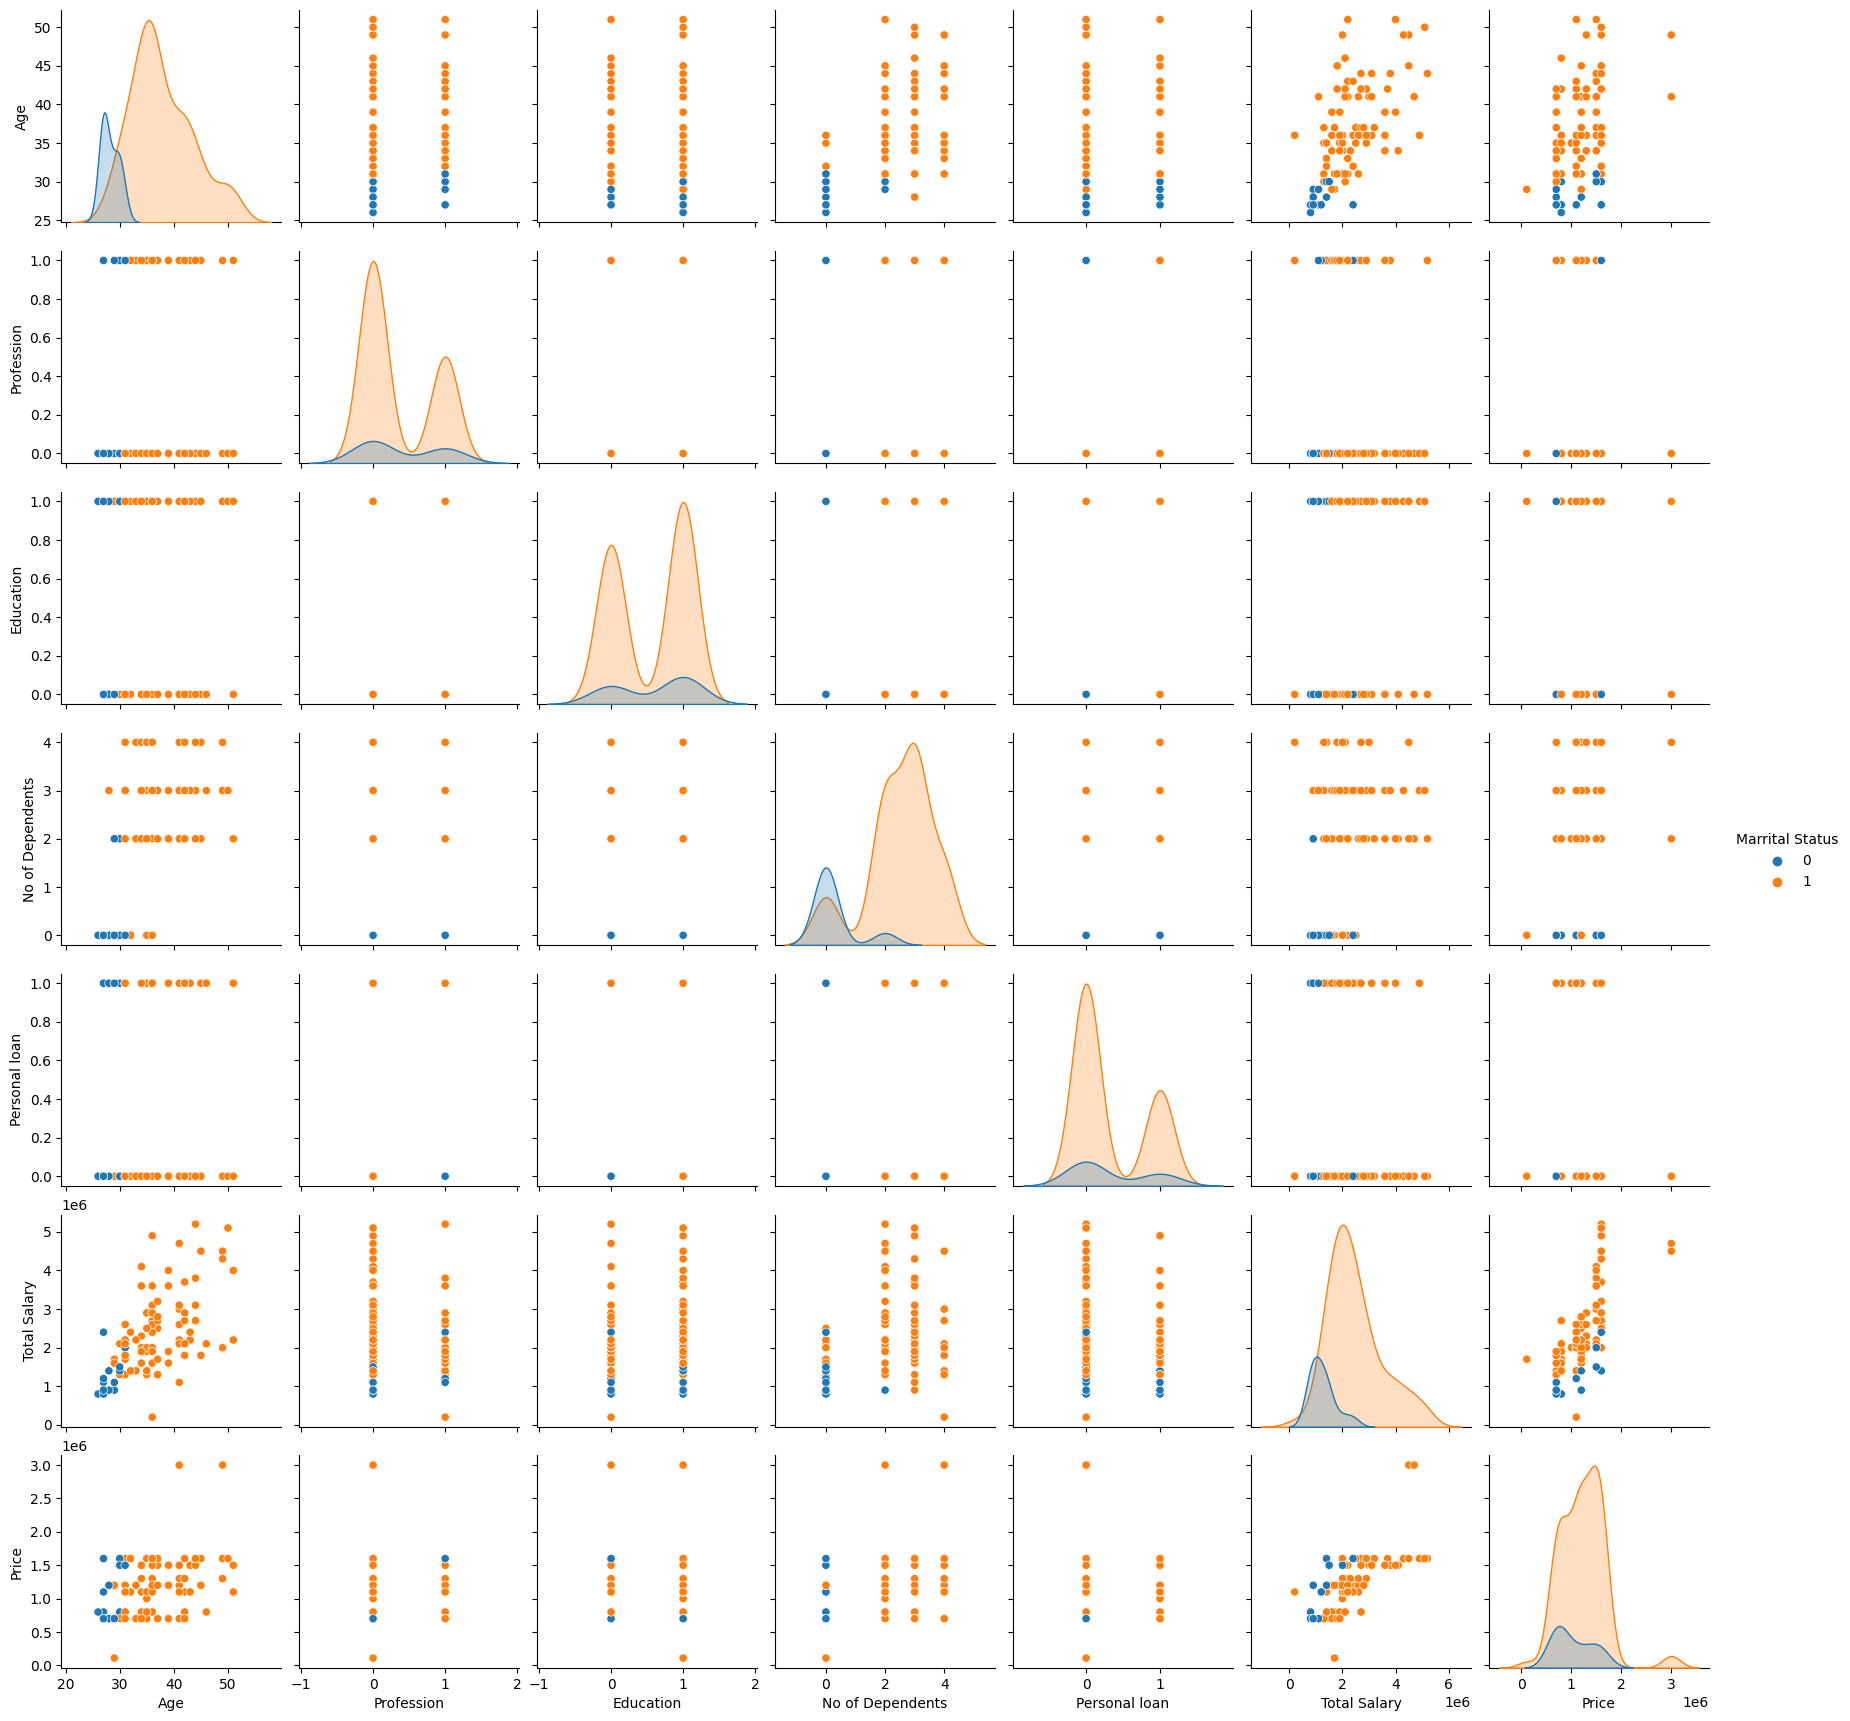

In [24]:
# Visualization of relationships between different variables
sns.pairplot(data, hue='Marrital Status')
plt.show()

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
EV_pca = pca.fit_transform(ev_a) 

# Printing the summary
SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_

index = []
for i in range(len(SD)):
    i = i + 1
    index.append("PC{}".format(i))

summary_df = pd.DataFrame({
    "Standard deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()
}, index=index)

summary_df

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.100428e+06,9.345781e-01,0.934578
PC2,2.911493e+05,6.542193e-02,1.000000
PC3,5.088140e+00,1.998068e-11,1.000000
PC4,1.107882e+00,9.472819e-13,1.000000
PC5,5.182971e-01,2.073240e-13,1.000000
PC6,4.611681e-01,1.641385e-13,1.000000
PC7,4.128202e-01,1.315267e-13,1.000000
PC8,2.479408e-01,4.744474e-14,1.000000


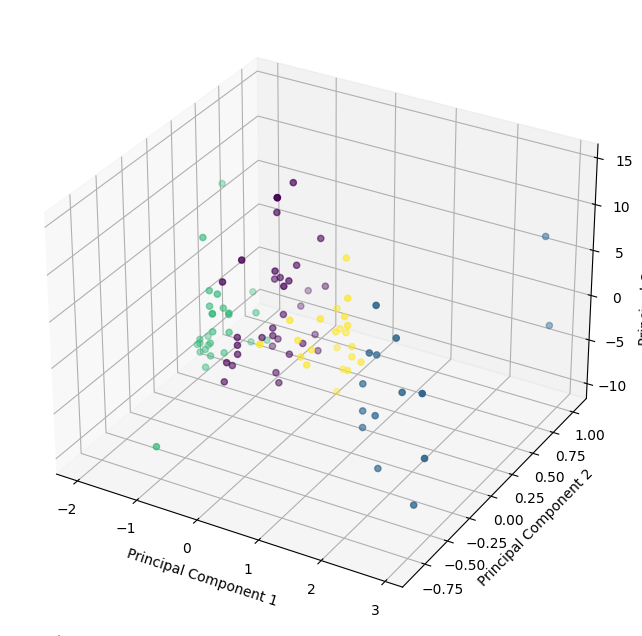

In [55]:
# Visualizing Principal Components obtained from PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(EV_pca[:, 0], EV_pca[:, 1], EV_pca[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

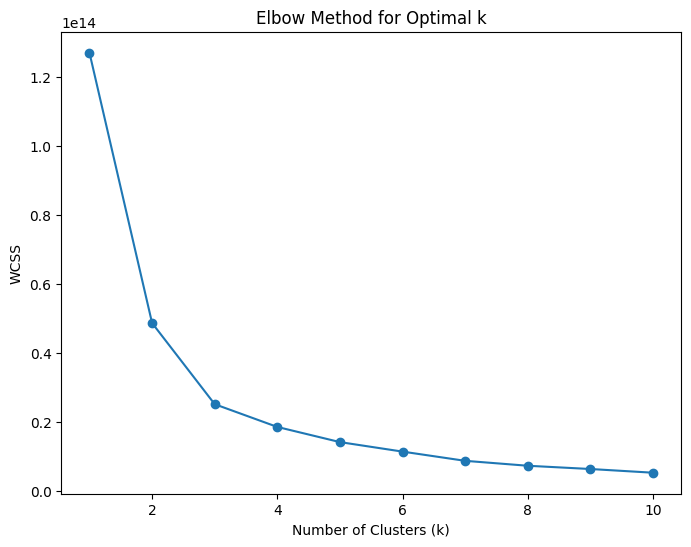

In [29]:
# Calculating the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ev_a)
    wcss.append(kmeans.inertia_)
    
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [30]:
# Choosing the optimal number of clusters
optimal_k = 4

# Applying K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(ev_a)

# Adding the cluster labels back to the original dataset
data['Cluster'] = cluster_labels

# Displaying the segmented data
data


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price,Cluster
0,27,0,0,1,0,1,800000,800000,2
1,35,0,1,1,2,1,2000000,1000000,0
2,45,1,1,0,4,1,1800000,1200000,0
3,41,1,1,1,3,0,2200000,1200000,0
4,31,0,1,1,2,1,2600000,1600000,3
...,...,...,...,...,...,...,...,...,...
94,27,1,0,0,0,0,2400000,1600000,3
95,50,0,1,1,3,0,5100000,1600000,1
96,51,1,1,0,2,1,2200000,1100000,0
97,51,0,1,1,2,0,4000000,1500000,1


In [32]:
# Counting the number of values in each cluster
data['Cluster'].value_counts()

Cluster
0    34
2    28
3    22
1    15
Name: count, dtype: int64

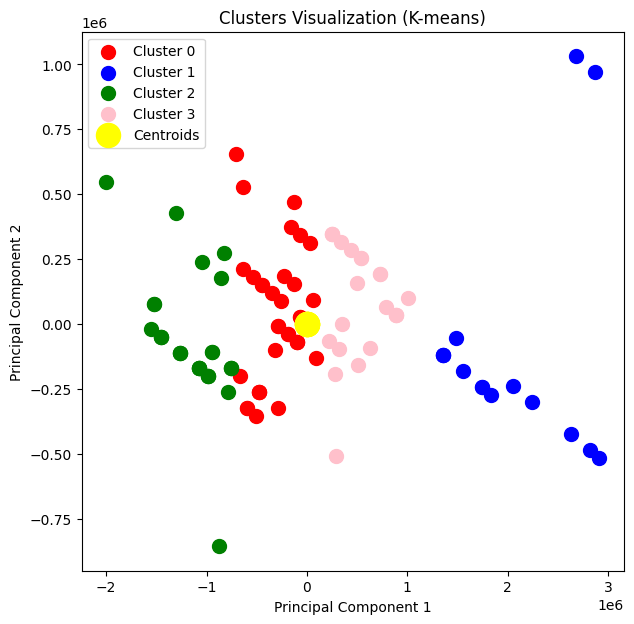

In [33]:
# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(EV_pca[cluster_labels == 0, 0], EV_pca[cluster_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(EV_pca[cluster_labels == 1, 0], EV_pca[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(EV_pca[cluster_labels == 2, 0], EV_pca[cluster_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(EV_pca[cluster_labels == 3, 0], EV_pca[cluster_labels == 3, 1], s = 100, c = 'pink', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Visualization (K-means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [48]:
# Segregating Clusters
Cluster_0 = data[data.Cluster==0]
Cluster_1 = data[data.Cluster==1]
Cluster_2 = data[data.Cluster==2]
Cluster_3 = data[data.Cluster==3]

In [34]:
# Average cost of the EV
data.Price.mean()

1194040.4040404041

In [35]:
# Average cost of a car in segment 1  
data.Price[data.Cluster==0].mean()

1135294.1176470588

In [36]:
# Average cost of a car in segment 2
data.Price[data.Cluster==1].mean()

1740000.0

In [37]:
# Average cost of a car in segment 3
data.Price[data.Cluster==2].mean()

782500.0

In [38]:
# Average cost of a car in segment 4
data.Price[data.Cluster==3].mean()

1436363.6363636365

In [52]:
# Analyzing Different Clusters
result = data.groupby("Cluster").agg({"Age":"mean", "Total Salary":"mean", "No of Dependents":"mean", "Price":"mean"}).round()
result

,Age,Total Salary,No of Dependents,Price
Cluster,,,,
0,37.0,1970588.0,2.0,1135294.0
1,42.0,4240000.0,3.0,1740000.0
2,32.0,1207143.0,2.0,782500.0
3,37.0,2745455.0,2.0,1436364.0


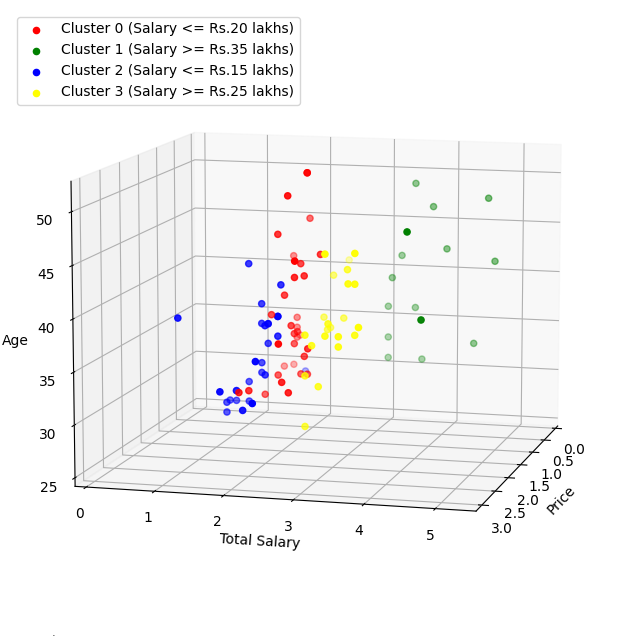

In [58]:
# Visualizing prices with respect to Total Salary and Age
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', label = 'Cluster 0 (Salary <= Rs.20 lakhs)')
ax.scatter(Cluster_1.Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 1 (Salary >= Rs.35 lakhs)')
ax.scatter(Cluster_2.Price, Cluster_2['Total Salary'],Cluster_2['Age'], color='blue', label = 'Cluster 2 (Salary <= Rs.15 lakhs)')
ax.scatter(Cluster_3.Price, Cluster_3['Total Salary'],Cluster_3['Age'], color='yellow', label = 'Cluster 3 (Salary >= Rs.25 lakhs)')
plt.legend(loc = 'upper left')

ax.view_init(10, 15)

plt.xlabel("Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()


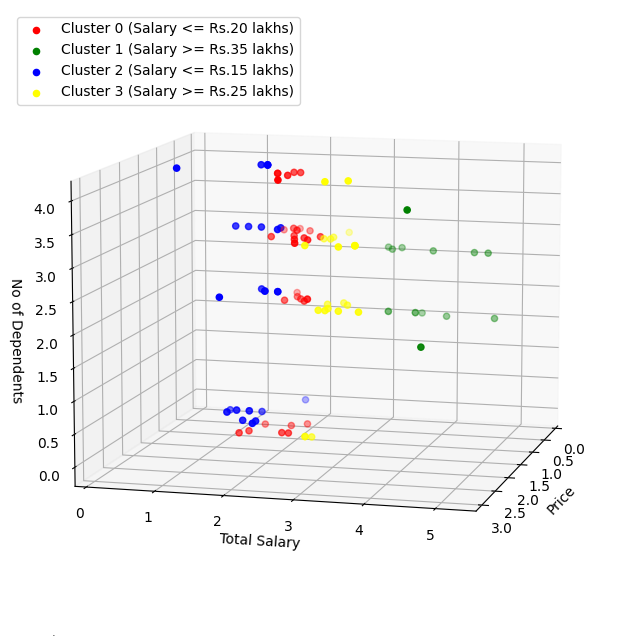

In [59]:
# Visualizing prices with respect to Total Salary and No of Dependents
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', label = 'Cluster 0 (Salary <= Rs.20 lakhs)')
ax.scatter(Cluster_1.Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 1 (Salary >= Rs.35 lakhs)')
ax.scatter(Cluster_2.Price, Cluster_2['Total Salary'],Cluster_2['No of Dependents'], color='blue', label = 'Cluster 2 (Salary <= Rs.15 lakhs)')
ax.scatter(Cluster_3.Price, Cluster_3['Total Salary'],Cluster_3['No of Dependents'], color='yellow', label = 'Cluster 3 (Salary >= Rs.25 lakhs)')
plt.legend(loc = 'upper left')

ax.view_init(10, 15)

plt.xlabel("Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

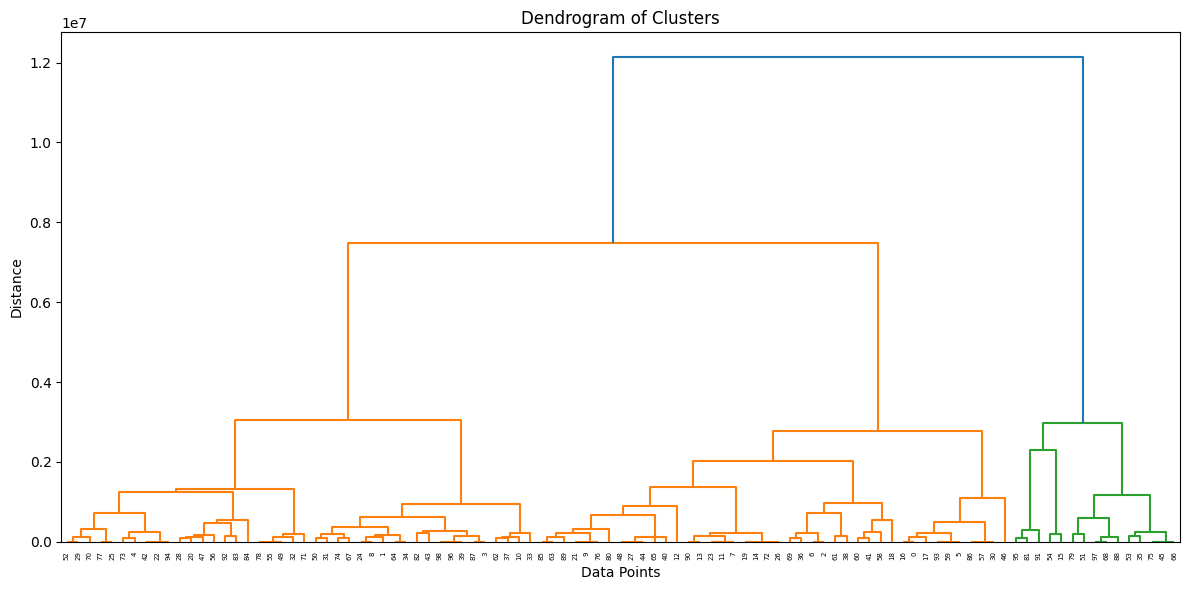

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing hierarchical clustering
linked = linkage(ev_a, 'ward') 

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           labels=data.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram of Clusters')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()